In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro, normaltest, probplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller

# For warnings (optional)
import warnings
warnings.filterwarnings('ignore')

# Ensure plots are displayed in the notebook or script
%matplotlib inline  # If using a Jupyter notebook, remove this if not

# Load and set up plot styles (optional)
plt.style.use('seaborn-darkgrid')

# Set default figure size for plots
plt.rcParams['figure.figsize'] = (10, 6)

UsageError: unrecognized arguments: # If using a Jupyter notebook, remove this if not


In [4]:
# Load the cleaned DataFrame from the CSV file
df = pd.read_csv('df.csv')

Descriptive Statistics:
       Weekly_Sales  Temperature   Fuel_Price          CPI  Unemployment
count  6.435000e+03  6435.000000  6435.000000  6435.000000   6435.000000
mean   1.046965e+06    60.663782     3.358607   171.578394      7.999151
std    5.643666e+05    18.444933     0.459020    39.356712      1.875885
min    2.099862e+05    -2.060000     2.472000   126.064000      3.879000
25%    5.533501e+05    47.460000     2.933000   131.735000      6.891000
50%    9.607460e+05    62.670000     3.445000   182.616521      7.874000
75%    1.420159e+06    74.940000     3.735000   212.743293      8.622000
max    3.818686e+06   100.140000     4.468000   227.232807     14.313000

Skewness and Kurtosis:
Weekly_Sales - Skewness: 0.6682059921068103, Kurtosis: 0.05216738979784408
Temperature - Skewness: -0.3366890954177888, Kurtosis: -0.6132571716629429
Fuel_Price - Skewness: -0.09613588414498364, Kurtosis: -1.1773954280947325
CPI - Skewness: 0.06347704896208373, Kurtosis: -1.8393163728228026
Une

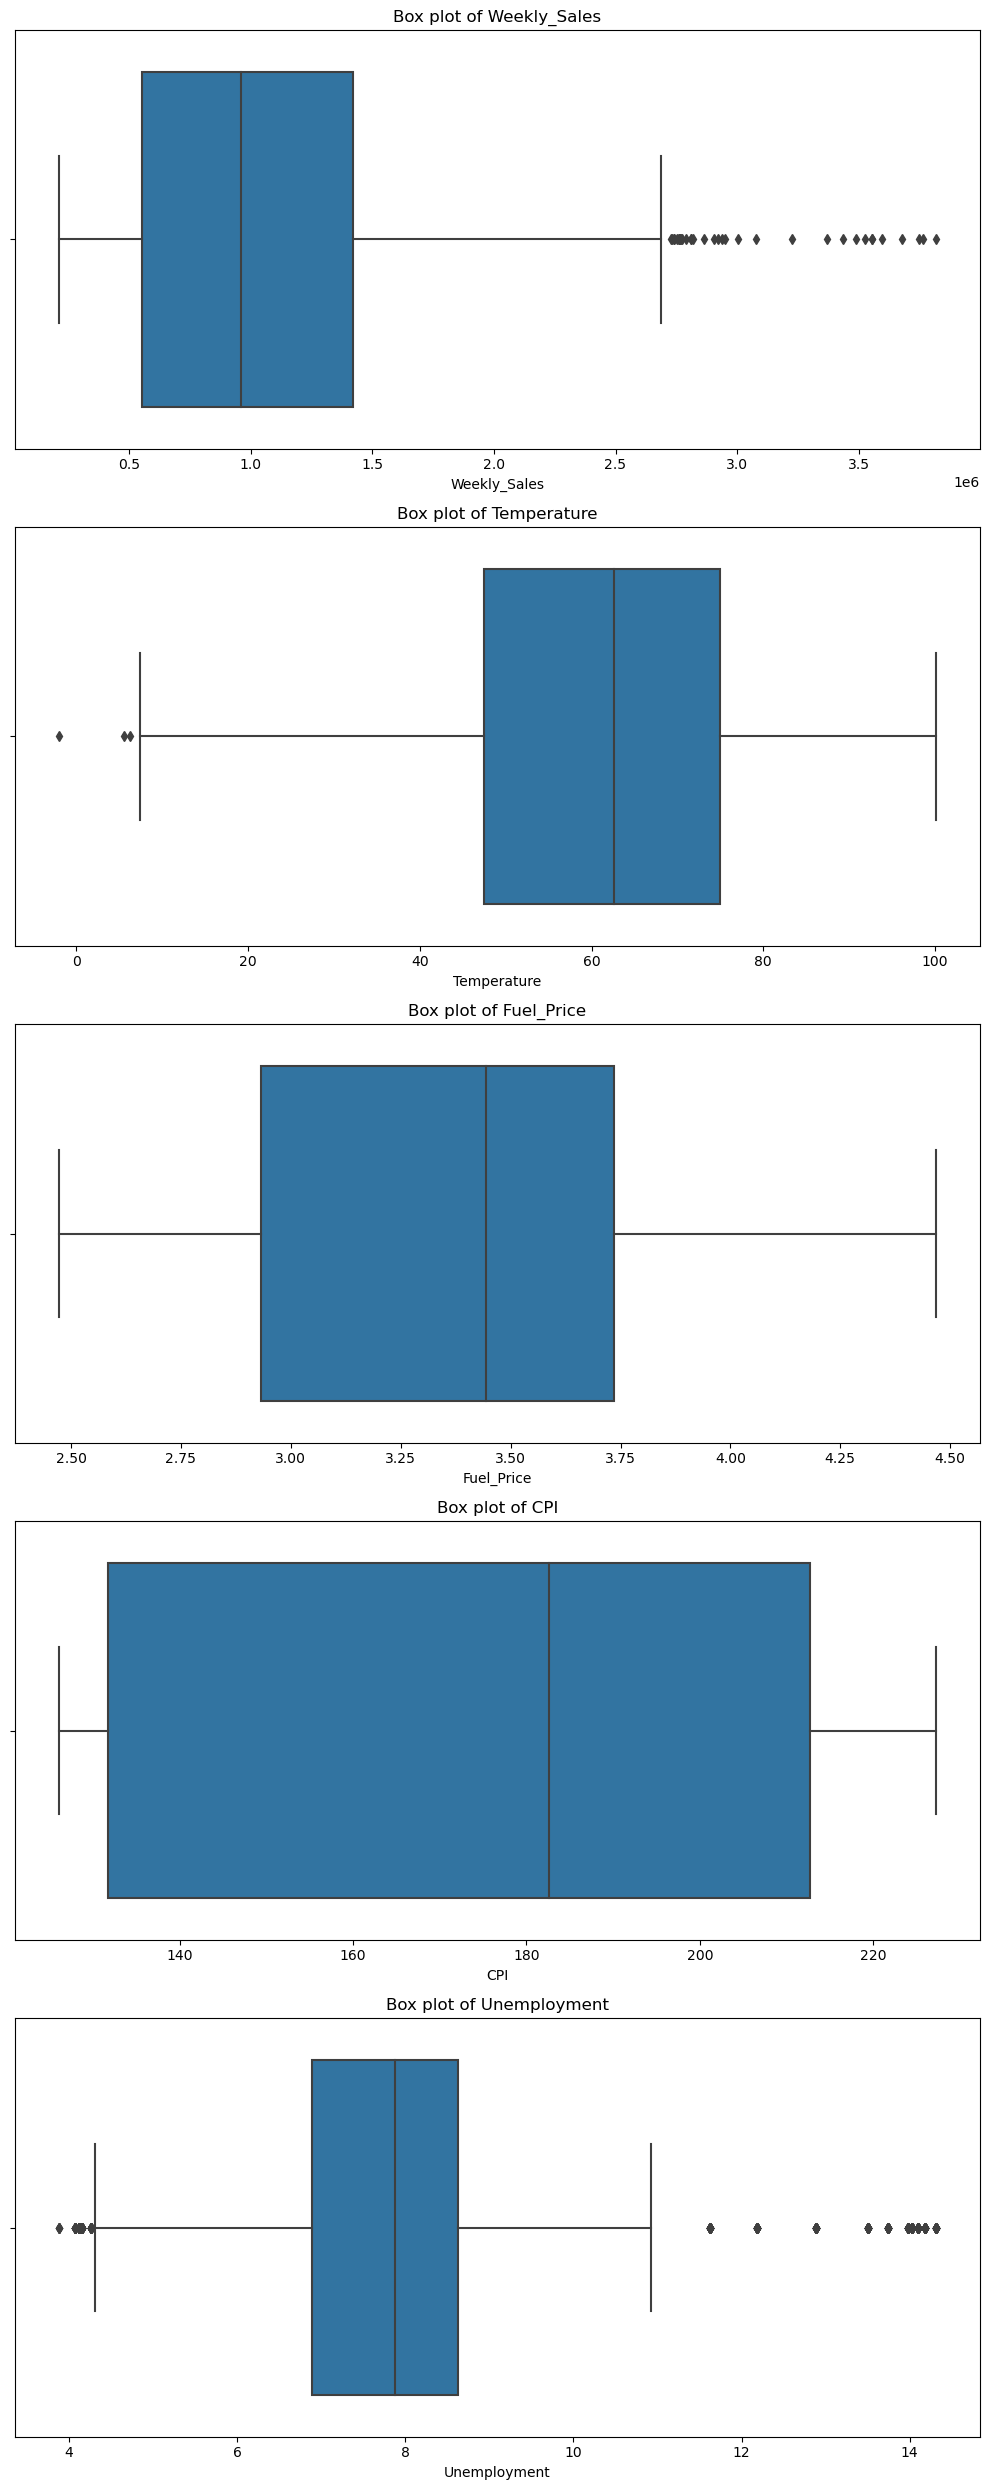

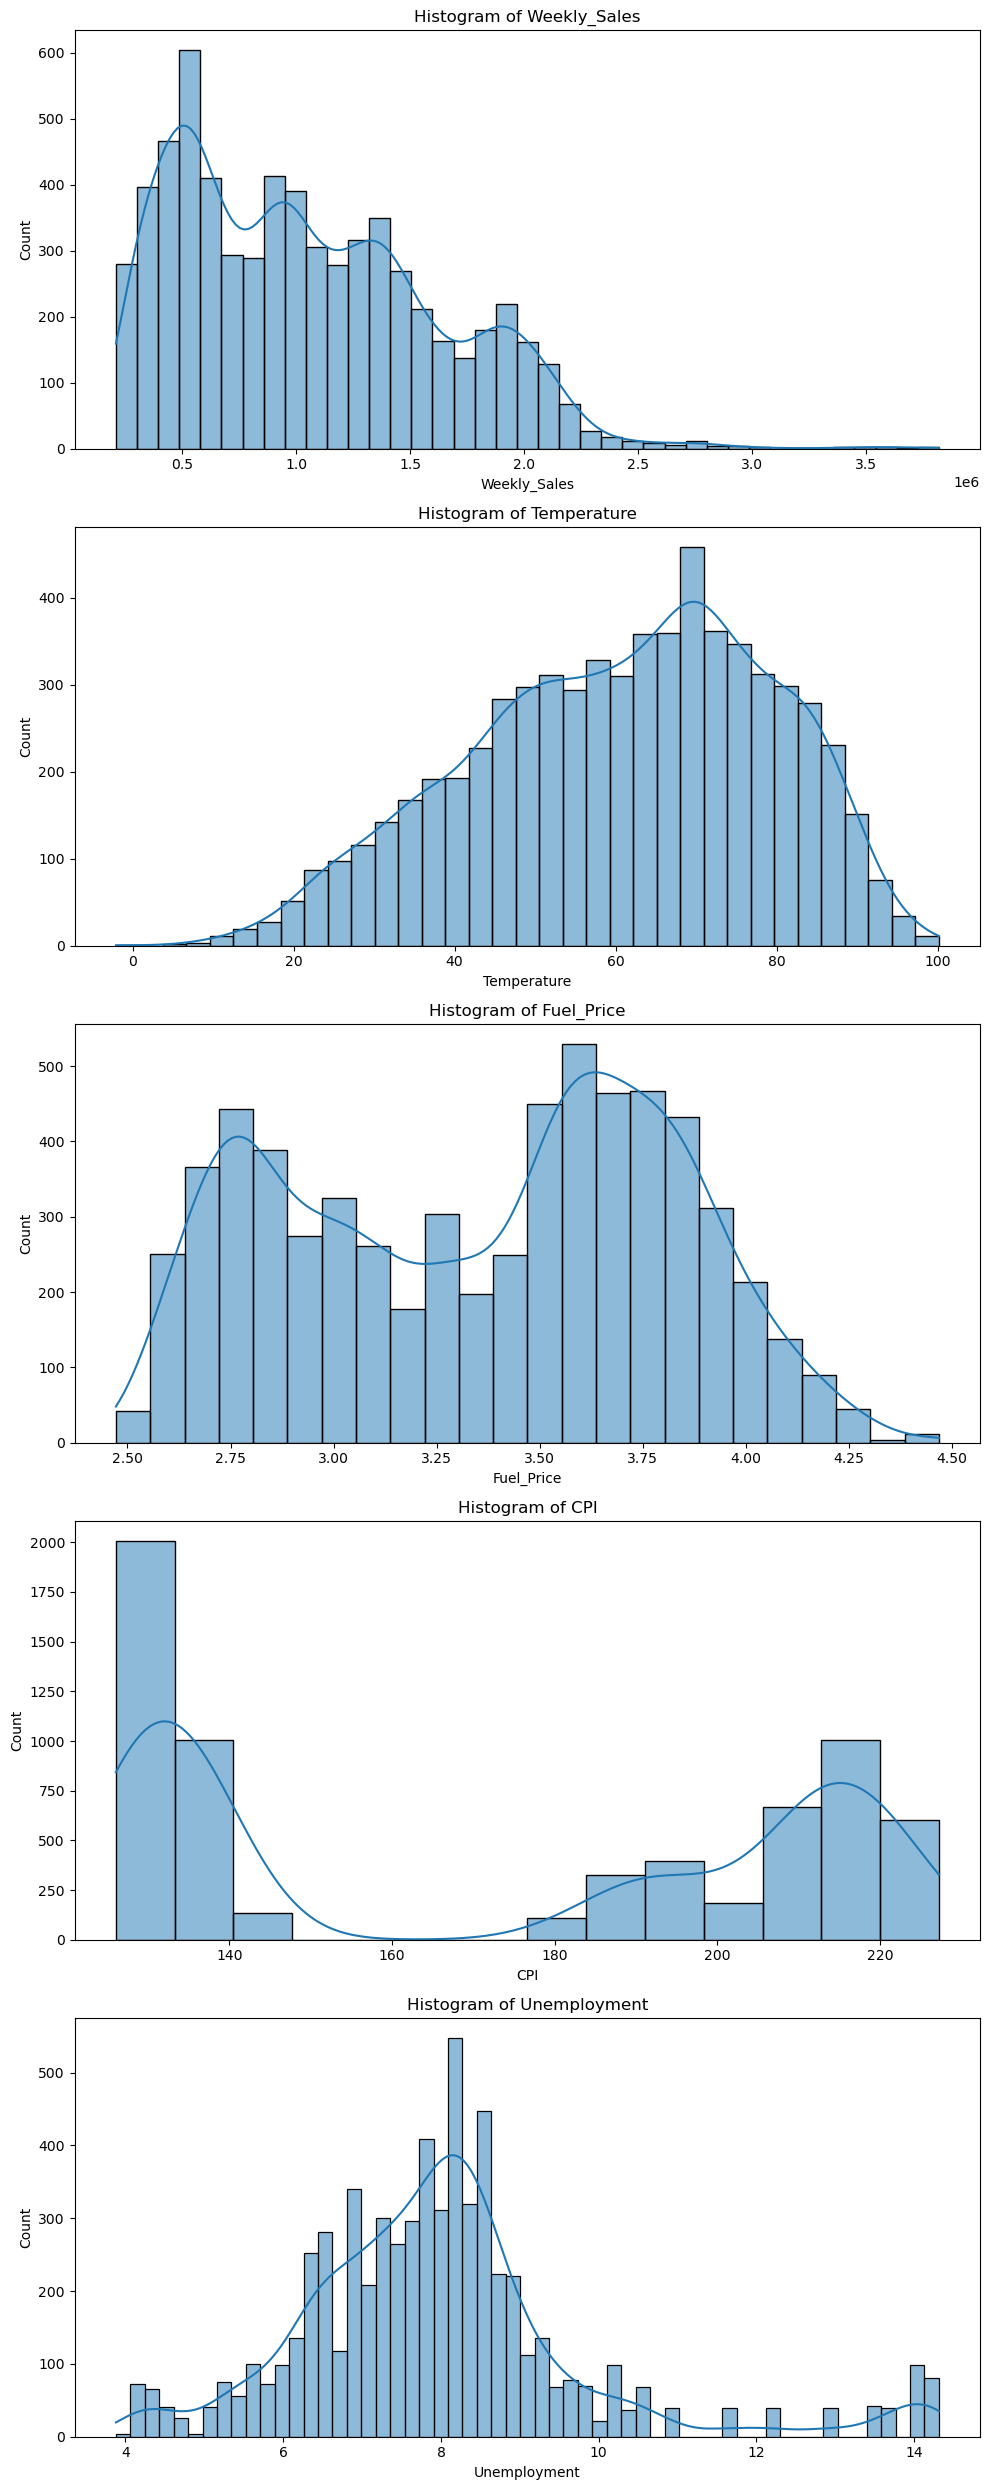

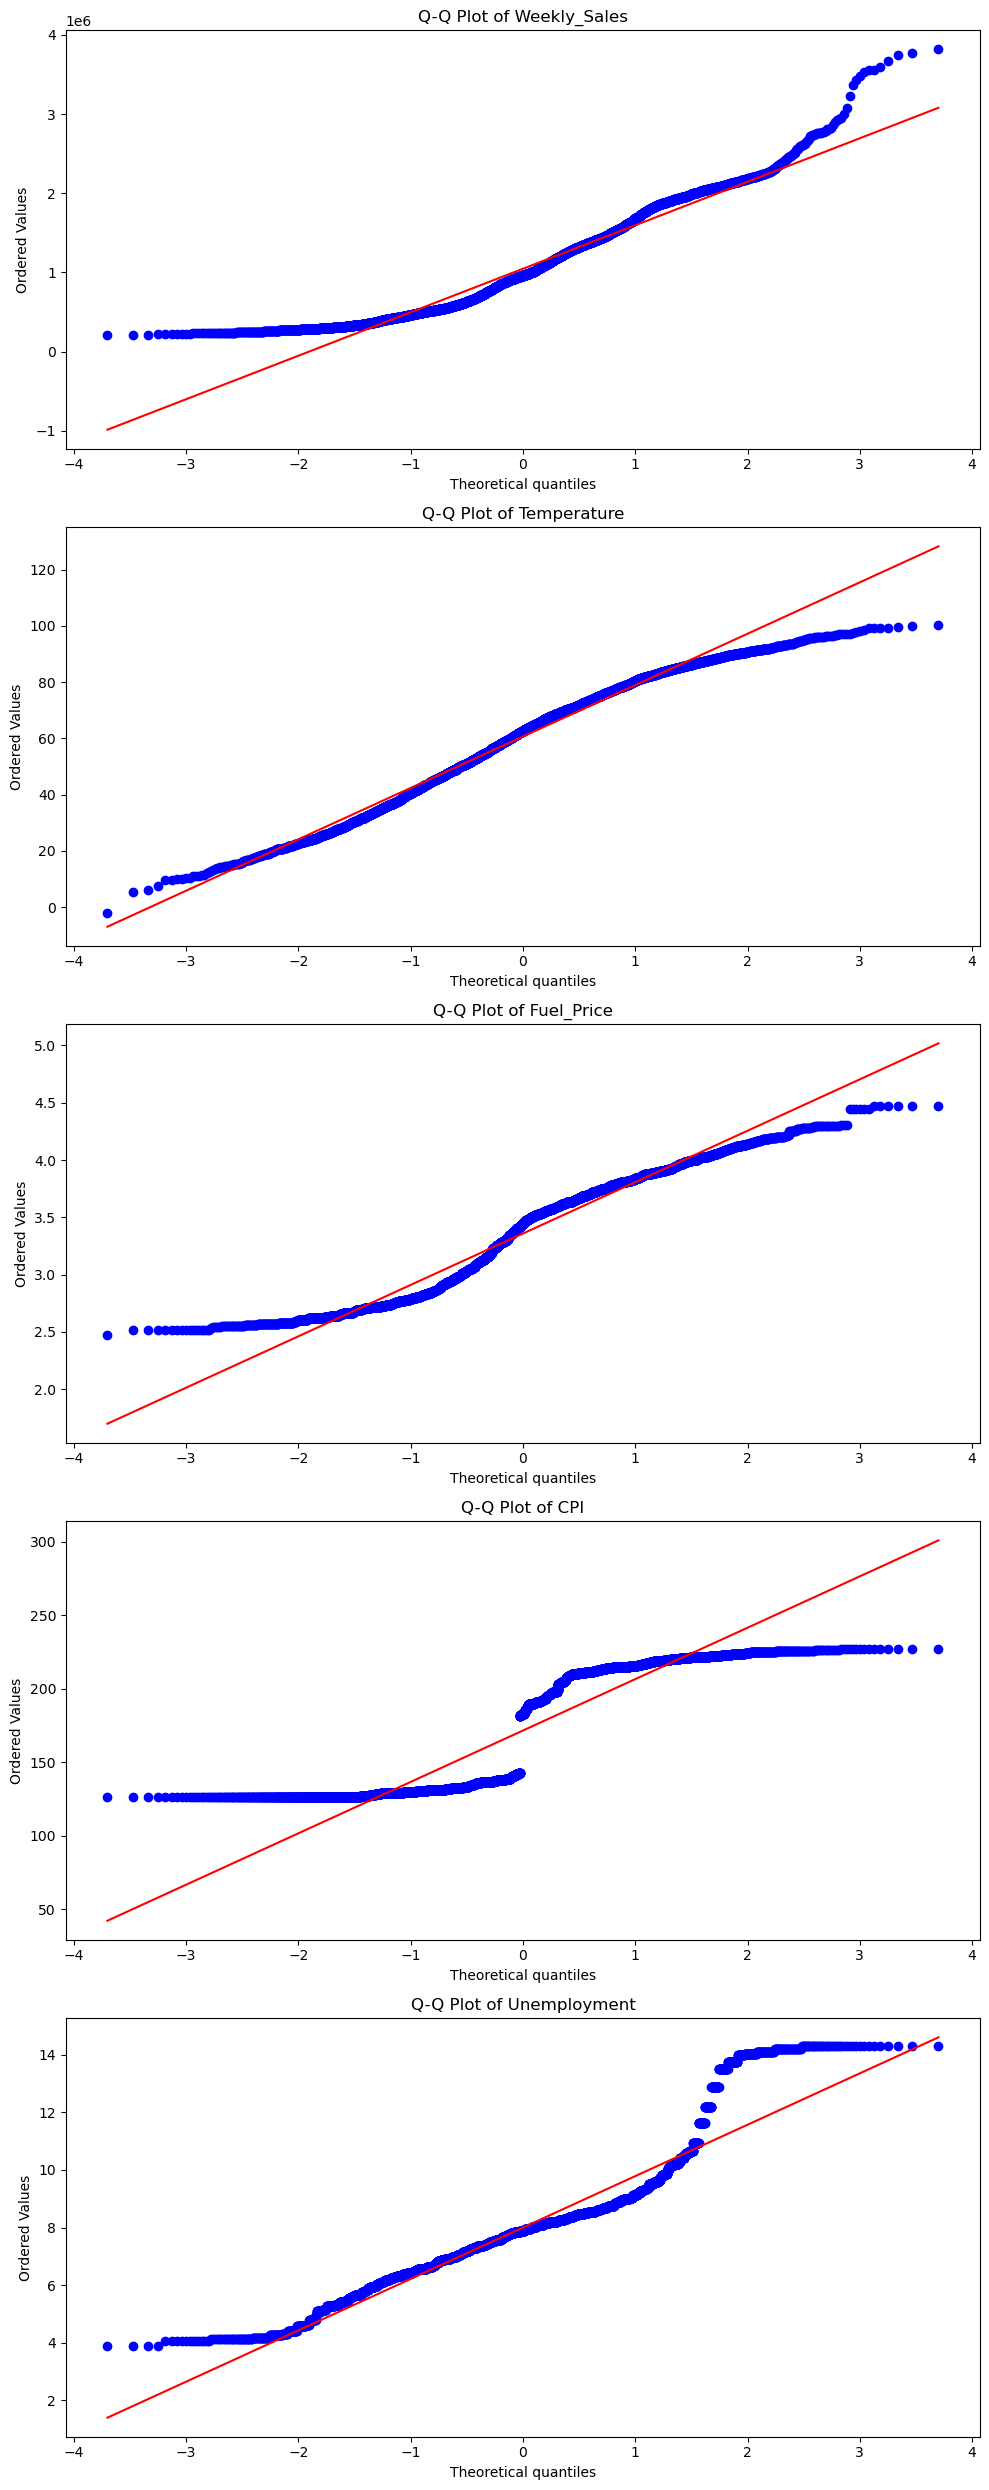

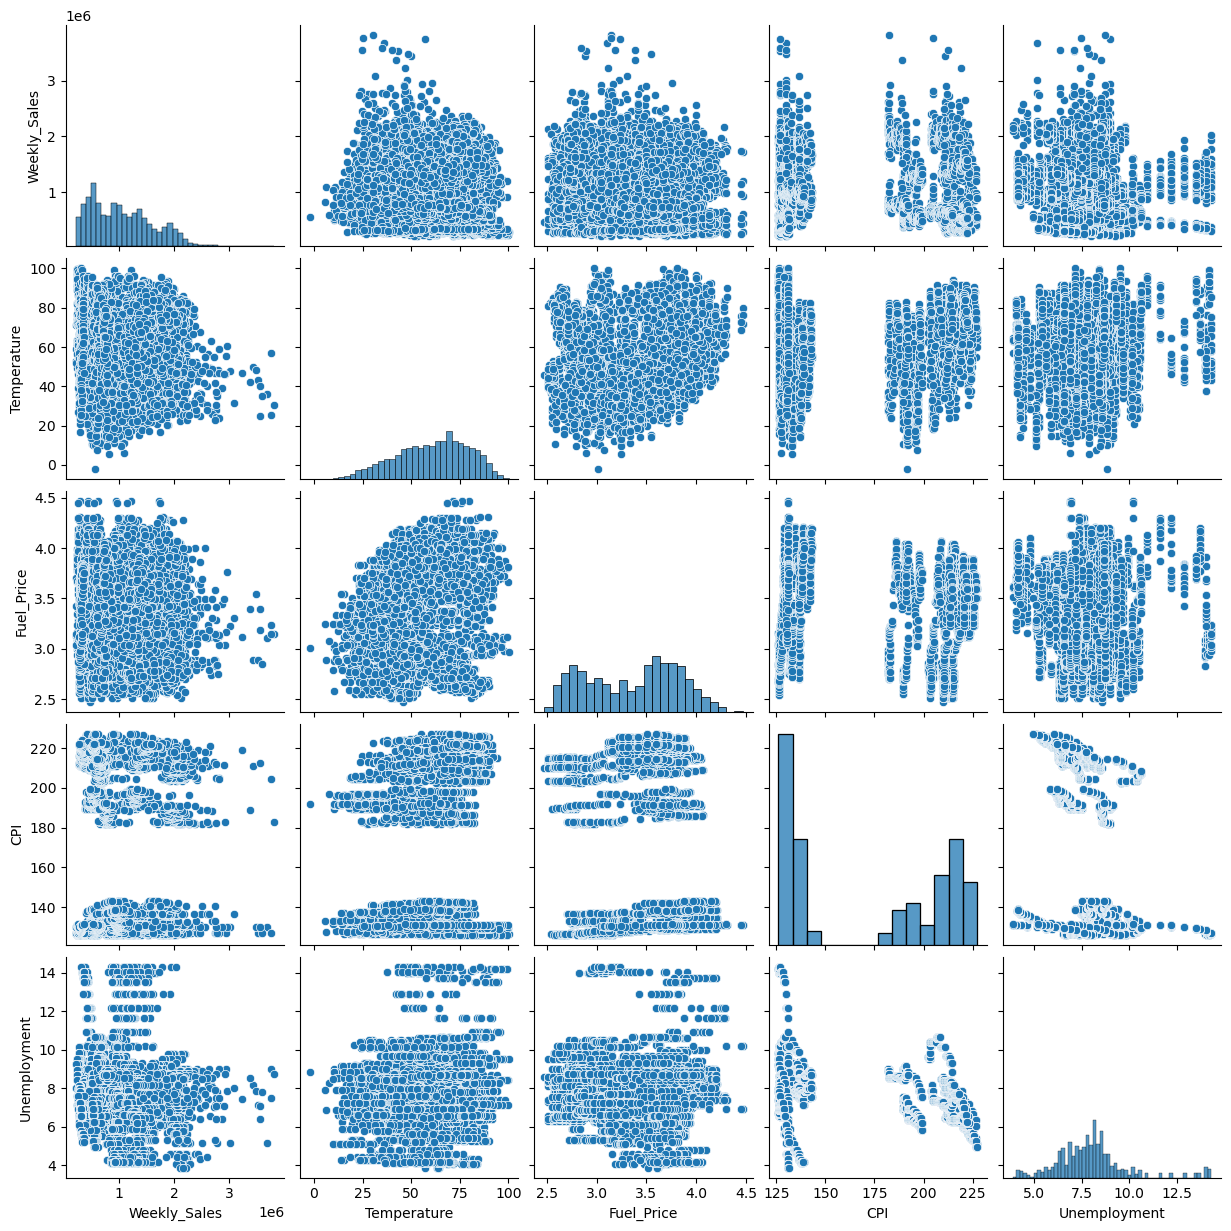

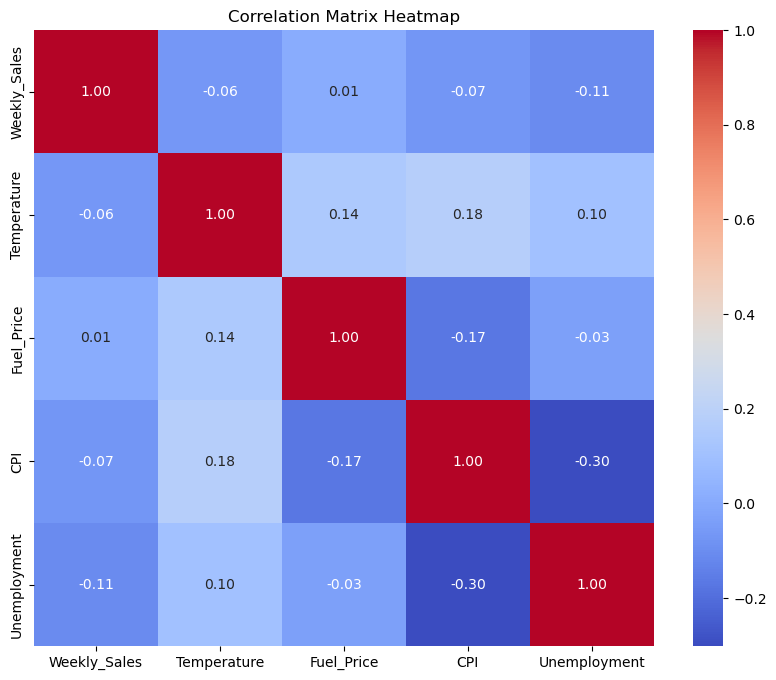

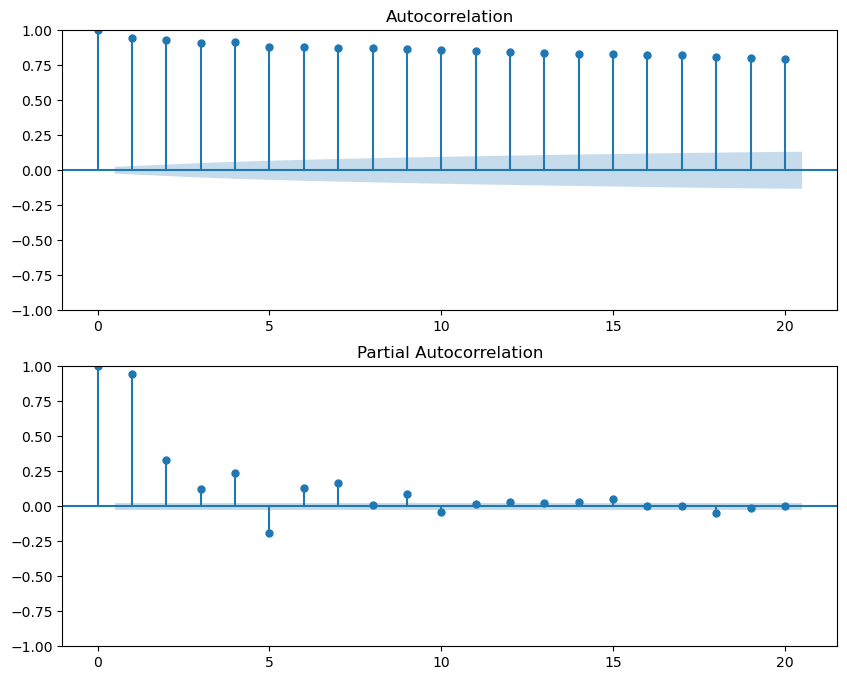

In [5]:
# Statistical Analysis

## Specify the columns to analyze
columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

## Filtering the dataframe to include only the columns of interest
df_test = df[columns]

## Descriptive Statistics
print("Descriptive Statistics:")
print(df_test.describe())

## Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for column in df_test.columns:
    print(f"{column} - Skewness: {skew(df_test[column].dropna())}, Kurtosis: {kurtosis(df_test[column].dropna())}")

## Normality Tests
print("\nNormality Tests:")
for column in df_test.columns:
    print(f"{column} - Shapiro-Wilk Test: {shapiro(df_test[column].dropna())}, D'Agostino's K-squared Test: {normaltest(df_test[column].dropna())}")

## Variance Inflation Factor (VIF) Calculation
## Separate features and target
target_column = 'Weekly_Sales'
X = df_test.drop(columns=[target_column])
y = df_test[target_column]

## Ensure target variable matches the filtered features
y = y.loc[X.index]

## Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

## Stationarity Test (For Time Series Data)
print("\nStationarity Test (Augmented Dickey-Fuller Test):")
stationarity_tests = {col: adfuller(df_test[col].dropna()) for col in df_test.columns}
for column, test in stationarity_tests.items():
    print(f"{column} - ADF Statistic: {test[0]}, p-value: {test[1]}")

# Visual Exploration

## Box plots for visual inspection of outliers
fig, axes = plt.subplots(nrows=len(df_test.columns), ncols=1, figsize=(10, 5 * len(df_test.columns)))
for i, col in enumerate(df_test.columns):
    sns.boxplot(x=df_test[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

## Histograms to check the distribution
fig, axes = plt.subplots(nrows=len(df_test.columns), ncols=1, figsize=(10, 5 * len(df_test.columns)))
for i, col in enumerate(df_test.columns):
    sns.histplot(df_test[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

## Q-Q plots for normality check
fig, axes = plt.subplots(nrows=len(df_test.columns), ncols=1, figsize=(10, 5 * len(df_test.columns)))
for i, col in enumerate(df_test.columns):
    probplot(df_test[col].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot of {col}')
plt.tight_layout()
plt.show()

## Pair Plot to visualize pairwise relationships
sns.pairplot(df_test)
plt.show()

## Heatmap of the correlation matrix
correlation_matrix = df_test.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## ACF and PACF plots for time series data (Example for 'Weekly_Sales')
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_test['Weekly_Sales'].dropna(), ax=axes[0], lags=20)
plot_pacf(df_test['Weekly_Sales'].dropna(), ax=axes[1], lags=20)
plt.show()